# **Oficina 7: Usando um algoritmo de clustering**

In [1]:
# Importando as ferramentas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Gerando o dataset sintético
np.random.seed(0)
n_samples = 300

data = {
    'valor_medio_gasto': np.random.randn(n_samples) * 20 + 200,
    'frequencia_compras': np.random.randn(n_samples) * 5 + 15,
    'categorias_produtos': np.random.randn(n_samples) * 2 + 8
}
df = pd.DataFrame(data)

In [3]:
# Visualizando o dataset
df.head()

,valor_medio_gasto,frequencia_compras,categorias_produtos
0,235.281047,8.467366,4.899141
1,208.003144,23.290653,8.834638
2,219.574760,14.409180,6.111263
3,244.817864,11.599109,8.476206
4,237.351160,18.331915,5.188074


In [4]:
# visualizando as informações estatísticas do dataset
df.describe()

,valor_medio_gasto,frequencia_compras,categorias_produtos
count,300.000000,300.000000,300.000000
mean,200.550592,14.312847,7.808835
std,20.047467,5.005915,1.923080
min,144.548145,-0.230715,2.330891
25%,186.541430,11.308093,6.457112
50%,200.493097,14.347098,7.863083
75%,213.673009,17.728835,8.946820
max,247.662895,28.481120,13.188849


## Treinado o modelo 

In [5]:
# Treinando o modelo KMeans
kmeans = KMeans(n_clusters=3, random_state=42);
kmeans.fit(df)

c:\Labs\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Labs\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^

KMeans(n_clusters=3, random_state=42)

In [6]:
# obtendo os centróides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

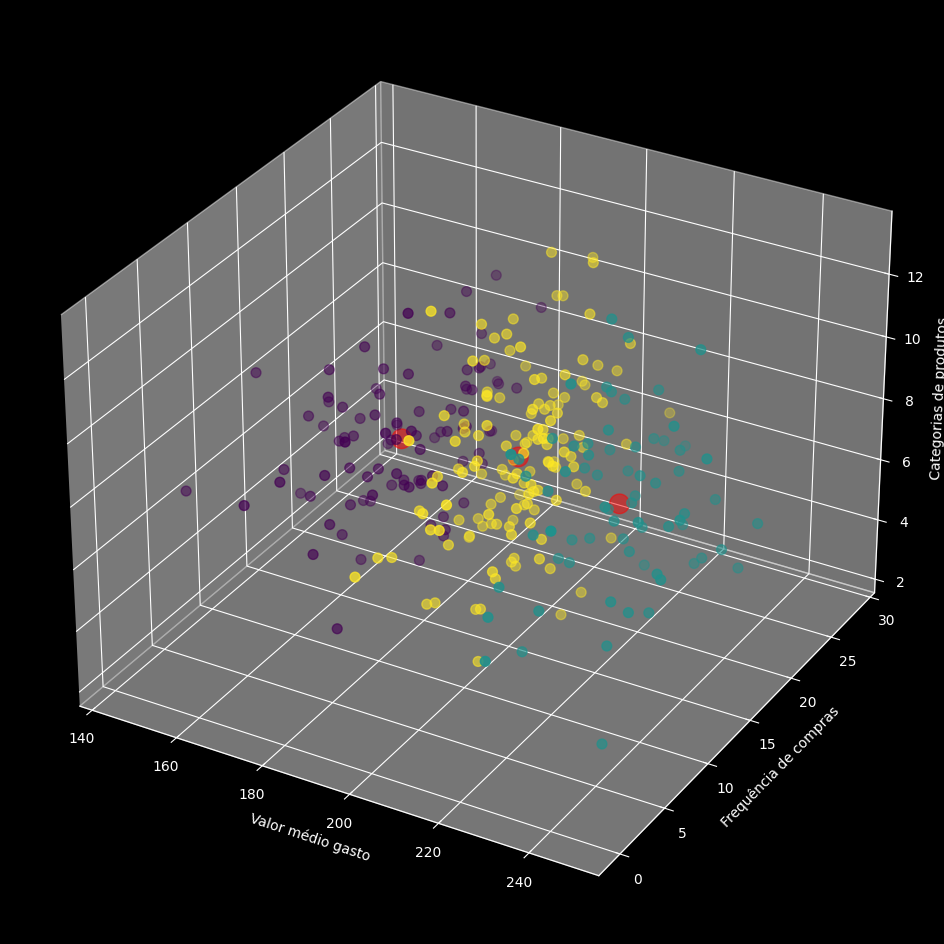

In [7]:
# Visualizando os clusters
df['cluster'] = labels
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['valor_medio_gasto'], df['frequencia_compras'], df['categorias_produtos'], c=labels, cmap='viridis', s=50)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=200, alpha=0.5)
ax.set_xlabel('Valor médio gasto')
ax.set_ylabel('Frequência de compras')
ax.set_zlabel('Categorias de produtos')
plt.show()


1. É eficiente, pois funciona bem para grandes volumes de dados, como os de clientes. Além disso, é de fácil interpretação, já que cada cluster representa um grupo com características semelhantes. Também é aplicável à segmentação de clientes, pois auxilia na personalização de estratégias de marketing.
2. A vantagem do K-Means é que ele é rápido, escalável e funciona bem mesmo com grandes bases de clientes. No entanto, a desvantagem é que ele é sensível a outliers, podendo ter seus clusters distorcidos por clientes com comportamentos muito diferentes.
3. Cada cluster pode representar um perfil de cliente, permitindo ações estratégicas. Por exemplo:  
Clientes frequentes e com altos gastos: oferecer descontos VIP para fidelização.  
Clientes ocasionalmente ativos: criar campanhas de reativação por e-mail para engajá-los.